# EDA on EvictionLab Tn Data
- The Eviction Lab has provided me with longitudinal (2000 - 2016) data frames at the 
- State, 
- County, 
- City, 
- Census Tract, and 
- Block Group levels

the variables of interest for each geoid are: 
   - population
   - poverty rate
   - renter occupation percentage
   - median gross rent
   - median household income
   - median property value
   - rent burden
   - racial percents
   - renter occupied households
   - eviction filings
   - evictions
   - eviction-rate
   - eviction-filing-rate
   - low-flage
       - where the EL believes the reported data is too low


- All the data is clean and orderly
* although it remains a question how many missing values there may be
- the data seems to be easily plottable via mapbox
    - it is also highly responsive on their website

In [36]:
main_df.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'low-flag', 'imputed', 'subbed'],
      dtype='object')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
import seaborn as sns

In [102]:
sns.set(style = "darkgrid")

In [3]:
ls data/

all.csv               cities.geojson        states.geojson
block-groups.csv      counties.csv          tracts.csv
block-groups.geojson  counties.geojson      tracts.geojson
cities.csv            states.csv


In [4]:
main_df = pd.read_csv('data/all.csv')
main_df.head()

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,47,2000,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,216654.0,4327.0,4012.0,1.85,2.00,1,0,0
1,47,2001,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,644469.0,40308.0,21137.0,3.28,6.25,1,0,0
2,47,2002,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,670555.0,34087.0,19987.0,2.98,5.08,1,0,0
3,47,2003,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,697749.0,48211.0,24730.0,3.54,6.91,1,0,0
4,47,2004,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,701332.0,49125.0,25011.0,3.57,7.00,1,0,0


In [5]:
main_df[14:28]

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
14,47,2014,Tennessee,USA,6499615.0,13.23,33.23,764.0,45219.0,142100.0,...,1.74,0.11,651579.0,49135.0,18049.0,2.77,7.54,1,0,0
15,47,2015,Tennessee,USA,6499615.0,13.23,33.23,764.0,45219.0,142100.0,...,1.74,0.11,681600.0,49210.0,20371.0,2.99,7.22,1,0,0
16,47,2016,Tennessee,USA,6499615.0,13.23,33.23,764.0,45219.0,142100.0,...,1.74,0.11,703544.0,46907.0,19556.0,2.78,6.67,1,0,0
17,47001,2000,Anderson County,Tennessee,71330.0,13.14,27.49,450.0,35483.0,87500.0,...,1.14,0.07,8189.0,125.0,118.0,1.44,1.53,0,0,1
18,47003,2000,Bedford County,Tennessee,37586.0,13.14,26.46,488.0,36729.0,79000.0,...,0.77,0.05,3679.0,104.0,98.0,2.66,2.83,0,0,0
19,47005,2000,Benton County,Tennessee,16537.0,15.63,19.47,367.0,28679.0,67000.0,...,0.62,0.03,1336.0,17.0,17.0,1.27,1.27,0,0,0
20,47007,2000,Bledsoe County,Tennessee,12367.0,18.07,18.24,343.0,28982.0,67200.0,...,1.03,0.02,808.0,0.0,0.0,0.00,0.00,0,0,0
21,47009,2000,Blount County,Tennessee,105823.0,9.73,24.11,450.0,37862.0,103900.0,...,0.88,0.05,10286.0,210.0,201.0,1.95,2.04,0,0,1
22,47011,2000,Bradley County,Tennessee,87965.0,12.22,31.43,455.0,35034.0,91700.0,...,1.08,0.08,10774.0,NaN,NaN,NaN,NaN,0,0,0
23,47013,2000,Campbell County,Tennessee,39854.0,22.83,26.59,356.0,25285.0,65600.0,...,0.87,0.03,4288.0,80.0,75.0,1.75,1.87,0,0,0


# how are the rows ordered? 
- grouped by year then county? 
- (except for the first rows of TN?)

In [37]:
main_df.year[0:50]

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2000
18    2000
19    2000
20    2000
21    2000
22    2000
23    2000
24    2000
25    2000
26    2000
27    2000
28    2000
29    2000
30    2000
31    2000
32    2000
33    2000
34    2000
35    2000
36    2000
37    2000
38    2000
39    2000
40    2000
41    2000
42    2000
43    2000
44    2000
45    2000
46    2000
47    2000
48    2000
49    2000
Name: year, dtype: int64

In [7]:
main_df.name.value_counts()

9801.1                               221
9801.0                               221
9501.1                               119
9501.0                               119
9702.0                               119
9702.2                               119
9702.1                               119
9502.0                               102
9504.0                               102
9504.1                               102
9502.1                               102
9504.2                               102
9501.2                               102
9601.2                               102
9601.1                               102
9601.0                               102
9702.3                               102
9703.1                                85
9602.2                                85
9603.0                                85
9503.1                                85
9753.0                                85
107.1                                 85
9751.1                                85
106.1           

"names" that are floats correspond to census tracts and block groups

In [8]:
set(main_df.name)

{'701.02.2',
 '132.01',
 '205.12.2',
 '9665.5',
 'Dyer',
 '115.1',
 '171.2',
 '701.04.2',
 '15.01.1',
 'Parsons',
 '221.22.2',
 '156.13.1',
 'Roane County',
 'Covington',
 '156.17.2',
 '9605.01.3',
 '207.3',
 '9640.0',
 '59.03.2',
 '133.0',
 '401.0',
 '411.02',
 '9708.4',
 '46.08.1',
 'Norris',
 'Rockford',
 '217.53.1',
 '101.10.4',
 '504.03.2',
 '216.13.2',
 '103.07.3',
 'Alamo',
 '205.31.2',
 '221.11.2',
 'Watertown',
 '9506.0',
 '807.3',
 '503.02',
 '184.01',
 '9661.0',
 '509.2',
 '1106.2',
 '204.05',
 '9303.01.3',
 '806.05.1',
 '208.10.1',
 '9563.0',
 '614.02',
 '606.02.4',
 '9757.1',
 '205.02',
 'Lakewood Park',
 '104.31.1',
 '202.10.1',
 '428.01',
 'Finger',
 '191.11.2',
 '806.04.2',
 '128.02.3',
 '508.0',
 '414.01',
 '613.4',
 '5003.2',
 '9665.2',
 '509.06.2',
 '100.4',
 'Hillsboro',
 'Falling Water',
 '206.44.1',
 '605.02',
 '93.0',
 '1011.02.1',
 '1103.0',
 '304.2',
 'Hopewell',
 '702.03',
 '9704.1',
 '9309.1',
 '303.08.2',
 '17.1',
 '6.3',
 '407.0',
 '9652.2',
 '154.02.2',
 '

In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104028 entries, 0 to 104027
Data columns (total 27 columns):
GEOID                         104028 non-null int64
year                          104028 non-null int64
name                          104028 non-null object
parent-location               104028 non-null object
population                    104028 non-null float64
poverty-rate                  104028 non-null float64
pct-renter-occupied           104028 non-null float64
median-gross-rent             99340 non-null float64
median-household-income       103113 non-null float64
median-property-value         102648 non-null float64
rent-burden                   100076 non-null float64
pct-white                     104028 non-null float64
pct-af-am                     104028 non-null float64
pct-hispanic                  104028 non-null float64
pct-am-ind                    104028 non-null float64
pct-asian                     104028 non-null float64
pct-nh-pi                     10

In [10]:
main_df

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,47,2000,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,216654.0,4327.0,4012.0,1.85,2.00,1,0,0
1,47,2001,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,644469.0,40308.0,21137.0,3.28,6.25,1,0,0
2,47,2002,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,670555.0,34087.0,19987.0,2.98,5.08,1,0,0
3,47,2003,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,697749.0,48211.0,24730.0,3.54,6.91,1,0,0
4,47,2004,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,701332.0,49125.0,25011.0,3.57,7.00,1,0,0
5,47,2005,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,645711.0,46366.0,24563.0,3.80,7.18,1,0,0
6,47,2006,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,645932.0,48361.0,24421.0,3.78,7.49,1,0,0
7,47,2007,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,634528.0,51538.0,21583.0,3.40,8.12,1,0,0
8,47,2008,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,611475.0,50382.0,22360.0,3.66,8.24,1,0,0
9,47,2009,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,557880.0,46299.0,20461.0,3.67,8.30,1,0,0


# maybe every row is a (GEOID, year) unique pair


In [11]:
len(main_df.GEOID.unique())

6153

In [12]:
for g in set(main_df.GEOID[:100]):
    print('geoid', g, '-------------')
    print(set(main_df[main_df.GEOID == g].year))
    print('-------------------------')

geoid 47105 -------------
{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
-------------------------
geoid 47107 -------------
{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
-------------------------
geoid 47109 -------------
{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
-------------------------
geoid 47111 -------------
{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
-------------------------
geoid 47113 -------------
{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
-------------------------
geoid 47115 -------------
{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
-------------------------
geoid 47117 -------------
{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2

In [13]:
for g in set(main_df.GEOID[:100]):
    assert len(main_df[main_df.GEOID == g].year) == 17

That settles it. Every geoid got 17 years worth of data

# Check the Data Dictionary to see what the last rows are

In [14]:
main_df.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'pct-renter-occupied', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian',
       'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'low-flag', 'imputed', 'subbed'],
      dtype='object')

In [15]:
main_df[['low-flag', 'imputed', 'subbed']].describe()

,low-flag,imputed,subbed
count,104028.000000,104028.0,104028.000000
mean,0.045209,0.0,0.166676
std,0.207763,0.0,0.372688
min,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000
50%,0.000000,0.0,0.000000
75%,0.000000,0.0,0.000000
max,1.000000,0.0,1.000000


In [16]:
# weird. Looks like imputed was never used
main_df.imputed.value_counts()

0    104028
Name: imputed, dtype: int64

In [17]:
main_df['low-flag'].value_counts()

0    99325
1     4703
Name: low-flag, dtype: int64

In [18]:
main_df.subbed.value_counts()

0    86689
1    17339
Name: subbed, dtype: int64

### From their data dictionary
- imputed
    - Boolean variable indicating whether eviction numbers and renter-occupied-households were imputed
    - 0: false, 1: true
- subbed
    - Boolean variable indicating whether eviction numbers and renter-occupied-households were pulled from another source other than Eviction Lab sources
    - 0: false, 1: true
- flagged-low
    - does not appear in the data dictionary
    - but in their methods report it says they flagged some geoids as underestimating their eviction rates. 
        - **see page 40-42 in the methods report**

In [19]:
ls data/

all.csv               cities.geojson        states.geojson
block-groups.csv      counties.csv          tracts.csv
block-groups.geojson  counties.geojson      tracts.geojson
cities.csv            states.csv


In [20]:
counties_evicts_df = pd.read_csv('data/counties.csv')
counties_evicts_df.head(20)

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,47001,2000,Anderson County,Tennessee,71330.0,13.14,27.49,450.0,35483.0,87500.0,...,1.14,0.07,8189.0,125.0,118.0,1.44,1.53,0,0,1
1,47003,2000,Bedford County,Tennessee,37586.0,13.14,26.46,488.0,36729.0,79000.0,...,0.77,0.05,3679.0,104.0,98.0,2.66,2.83,0,0,0
2,47005,2000,Benton County,Tennessee,16537.0,15.63,19.47,367.0,28679.0,67000.0,...,0.62,0.03,1336.0,17.0,17.0,1.27,1.27,0,0,0
3,47007,2000,Bledsoe County,Tennessee,12367.0,18.07,18.24,343.0,28982.0,67200.0,...,1.03,0.02,808.0,0.0,0.0,0.00,0.00,0,0,0
4,47009,2000,Blount County,Tennessee,105823.0,9.73,24.11,450.0,37862.0,103900.0,...,0.88,0.05,10286.0,210.0,201.0,1.95,2.04,0,0,1
5,47011,2000,Bradley County,Tennessee,87965.0,12.22,31.43,455.0,35034.0,91700.0,...,1.08,0.08,10774.0,NaN,NaN,NaN,NaN,0,0,0
6,47013,2000,Campbell County,Tennessee,39854.0,22.83,26.59,356.0,25285.0,65600.0,...,0.87,0.03,4288.0,80.0,75.0,1.75,1.87,0,0,0
7,47015,2000,Cannon County,Tennessee,12826.0,12.77,21.45,382.0,32809.0,79600.0,...,0.76,0.05,1072.0,5.0,5.0,0.47,0.47,0,0,0
8,47017,2000,Carroll County,Tennessee,29475.0,13.89,21.08,384.0,30463.0,60900.0,...,0.97,0.04,2485.0,30.0,28.0,1.13,1.21,0,0,1
9,47019,2000,Carter County,Tennessee,56742.0,16.85,25.08,393.0,27371.0,77300.0,...,0.73,0.03,5891.0,NaN,NaN,NaN,NaN,0,0,0


In [21]:
counties_evicts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 27 columns):
GEOID                         1615 non-null int64
year                          1615 non-null int64
name                          1615 non-null object
parent-location               1615 non-null object
population                    1615 non-null float64
poverty-rate                  1615 non-null float64
pct-renter-occupied           1615 non-null float64
median-gross-rent             1615 non-null float64
median-household-income       1615 non-null float64
median-property-value         1615 non-null float64
rent-burden                   1615 non-null float64
pct-white                     1615 non-null float64
pct-af-am                     1615 non-null float64
pct-hispanic                  1615 non-null float64
pct-am-ind                    1615 non-null float64
pct-asian                     1615 non-null float64
pct-nh-pi                     1615 non-null float64
pct-multiple   

### Note: This is clean demographic and median income data at the county level for the past 17 years!
- that should make it super easy to augment my ACT achievement gap data
- Thank you EL!

## What other csvs did they give me?

In [22]:
ls data/

all.csv               cities.geojson        states.geojson
block-groups.csv      counties.csv          tracts.csv
block-groups.geojson  counties.geojson      tracts.geojson
cities.csv            states.csv


In [23]:
cities_df = pd.read_csv('data/cities.csv')
cities_df.head()

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,4700200,2000,Adams,Tennessee,566.0,12.46,18.23,508.0,32500.0,69200.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0
1,4700200,2001,Adams,Tennessee,566.0,12.46,18.23,508.0,32500.0,69200.0,...,0.0,0.0,36.53,0.60,0.28,0.76,1.65,0,0,0
2,4700200,2002,Adams,Tennessee,566.0,12.46,18.23,508.0,32500.0,69200.0,...,0.0,0.0,38.01,0.55,0.28,0.73,1.45,0,0,0
3,4700200,2003,Adams,Tennessee,566.0,12.46,18.23,508.0,32500.0,69200.0,...,0.0,0.0,39.54,1.43,1.43,3.62,3.62,0,0,0
4,4700200,2004,Adams,Tennessee,566.0,12.46,18.23,508.0,32500.0,69200.0,...,0.0,0.0,41.03,1.16,1.16,2.82,2.82,0,0,0


In [24]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 27 columns):
GEOID                         6822 non-null int64
year                          6822 non-null int64
name                          6822 non-null object
parent-location               6822 non-null object
population                    6822 non-null float64
poverty-rate                  6822 non-null float64
pct-renter-occupied           6822 non-null float64
median-gross-rent             6514 non-null float64
median-household-income       6779 non-null float64
median-property-value         6767 non-null float64
rent-burden                   6550 non-null float64
pct-white                     6822 non-null float64
pct-af-am                     6822 non-null float64
pct-hispanic                  6822 non-null float64
pct-am-ind                    6822 non-null float64
pct-asian                     6822 non-null float64
pct-nh-pi                     6822 non-null float64
pct-multiple   

In [28]:
# How many unique citie names are there in the cities df
len(set(cities_df.name))
# 439 different cities

439

In [29]:
set(cities_df.name)

{'Adams',
 'Adamsville',
 'Alamo',
 'Alcoa',
 'Alexandria',
 'Algood',
 'Allardt',
 'Altamont',
 'Andersonville',
 'Apison',
 'Ardmore',
 'Arlington',
 'Ashland City',
 'Athens',
 'Atoka',
 'Atwood',
 'Auburntown',
 'Baileyton',
 'Baneberry',
 'Banner Hill',
 'Bartlett',
 'Baxter',
 'Bean Station',
 'Beersheba Springs',
 'Bell Buckle',
 'Belle Meade',
 'Bells',
 'Benton',
 'Berry Hill',
 'Bethel Springs',
 'Bethpage',
 'Big Sandy',
 'Blaine',
 'Bloomingdale',
 'Blountville',
 'Bluff City',
 'Bolivar',
 'Bon Aqua Junction',
 'Bowman',
 'Braden',
 'Bradford',
 'Bransford',
 'Brentwood',
 'Brighton',
 'Bristol',
 'Brownsville',
 'Bruceton',
 'Bulls Gap',
 'Burlison',
 'Burns',
 'Byrdstown',
 'Calhoun',
 'Camden',
 'Carthage',
 'Caryville',
 'Castalian Springs',
 'Cedar Hill',
 'Celina',
 'Centertown',
 'Centerville',
 'Central',
 'Chapel Hill',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chesterfield',
 'Christiana',
 'Church Hill',
 'Clarkrange',
 'Clarksburg',
 'Clarksville',
 'Cleve

In [31]:
cities_df[cities_df.name == 'Nashville-Davidson']

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
4359,4752006,2000,Nashville-Davidson,Tennessee,545524.0,13.26,45.46,614.0,39232.0,113300.0,...,1.75,0.17,NaN,NaN,NaN,NaN,NaN,0,0,0
4360,4752006,2001,Nashville-Davidson,Tennessee,545524.0,13.26,45.46,614.0,39232.0,113300.0,...,1.75,0.17,103921.6,10675.90,4990.71,4.80,10.27,0,0,0
4361,4752006,2002,Nashville-Davidson,Tennessee,545524.0,13.26,45.46,614.0,39232.0,113300.0,...,1.75,0.17,104702.5,10467.76,4603.90,4.40,10.00,0,0,0
4362,4752006,2003,Nashville-Davidson,Tennessee,545524.0,13.26,45.46,614.0,39232.0,113300.0,...,1.75,0.17,105517.3,10943.42,5390.35,5.11,10.37,0,0,0
4363,4752006,2004,Nashville-Davidson,Tennessee,545524.0,13.26,45.46,614.0,39232.0,113300.0,...,1.75,0.17,106304.6,9925.19,5325.27,5.01,9.34,0,0,0
4364,4752006,2005,Nashville-Davidson,Tennessee,592497.0,12.34,41.68,750.0,45194.0,157200.0,...,1.07,0.12,107179.8,8713.71,6062.20,5.66,8.13,0,0,0
4365,4752006,2006,Nashville-Davidson,Tennessee,592497.0,12.34,41.68,750.0,45194.0,157200.0,...,1.07,0.12,107909.1,10616.18,5960.62,5.52,9.84,0,0,0
4366,4752006,2007,Nashville-Davidson,Tennessee,592497.0,12.34,41.68,750.0,45194.0,157200.0,...,1.07,0.12,108725.0,11694.60,3937.42,3.62,10.76,0,0,0
4367,4752006,2008,Nashville-Davidson,Tennessee,592497.0,12.34,41.68,750.0,45194.0,157200.0,...,1.07,0.12,109521.2,11363.22,4531.01,4.14,10.38,0,0,0
4368,4752006,2009,Nashville-Davidson,Tennessee,592497.0,12.34,41.68,750.0,45194.0,157200.0,...,1.07,0.12,110327.5,10714.54,4867.57,4.41,9.71,0,0,0


In [32]:
### let's take a look at the census tracts
tracts_df = pd.read_csv('data/tracts.csv')
tracts_df.head()

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,47001020100,2000,201.0,"Anderson County, Tennessee",2463.0,15.14,66.67,426.61,27250.48,91901.49,...,2.31,0.2,831.0,16.0,13.0,1.56,1.93,0,0,1
1,47001020100,2001,201.0,"Anderson County, Tennessee",2463.0,15.14,66.67,426.61,27250.48,91901.49,...,2.31,0.2,864.0,16.0,13.0,1.51,1.85,0,0,1
2,47001020100,2002,201.0,"Anderson County, Tennessee",2463.0,15.14,66.67,426.61,27250.48,91901.49,...,2.31,0.2,896.0,12.0,10.0,1.12,1.34,0,0,1
3,47001020100,2003,201.0,"Anderson County, Tennessee",2463.0,15.14,66.67,426.61,27250.48,91901.49,...,2.31,0.2,929.0,13.0,11.0,1.18,1.40,0,0,1
4,47001020100,2004,201.0,"Anderson County, Tennessee",2463.0,15.14,66.67,426.61,27250.48,91901.49,...,2.31,0.2,961.0,22.0,10.0,1.04,2.29,0,0,1


In [33]:
tracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25449 entries, 0 to 25448
Data columns (total 27 columns):
GEOID                         25449 non-null int64
year                          25449 non-null int64
name                          25449 non-null float64
parent-location               25449 non-null object
population                    25449 non-null float64
poverty-rate                  25449 non-null float64
pct-renter-occupied           25449 non-null float64
median-gross-rent             25151 non-null float64
median-household-income       25271 non-null float64
median-property-value         25195 non-null float64
rent-burden                   25198 non-null float64
pct-white                     25449 non-null float64
pct-af-am                     25449 non-null float64
pct-hispanic                  25449 non-null float64
pct-am-ind                    25449 non-null float64
pct-asian                     25449 non-null float64
pct-nh-pi                     25449 non-null flo

# Pairplots for each level of Granularity
(i.e. County, City, Census Tract, Block Group)

## Counties

In [67]:
counties_evicts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 27 columns):
GEOID                         1615 non-null int64
year                          1615 non-null int64
name                          1615 non-null object
parent-location               1615 non-null object
population                    1615 non-null float64
poverty-rate                  1615 non-null float64
pct-renter-occupied           1615 non-null float64
median-gross-rent             1615 non-null float64
median-household-income       1615 non-null float64
median-property-value         1615 non-null float64
rent-burden                   1615 non-null float64
pct-white                     1615 non-null float64
pct-af-am                     1615 non-null float64
pct-hispanic                  1615 non-null float64
pct-am-ind                    1615 non-null float64
pct-asian                     1615 non-null float64
pct-nh-pi                     1615 non-null float64
pct-multiple   

Other than name, and name of the parent location all the columns are numeric

In [81]:
# select numeric cols
numeric_cols = [s for s in counties_evicts_df.columns if s not in ['GEOID', 'year', 'name', 'parent-location']]
print(numeric_cols)

['population', 'poverty-rate', 'pct-renter-occupied', 'median-gross-rent', 'median-household-income', 'median-property-value', 'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households', 'eviction-filings', 'evictions', 'eviction-rate', 'eviction-filing-rate', 'low-flag', 'imputed', 'subbed']


In [88]:
len(numeric_cols)

23

In [91]:
counties_evicts_df[numeric_cols[0:7]].describe()

,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,64758.498452,14.654873,25.666644,539.862539,37216.504025,103201.795666,27.411950
std,123201.214663,4.065047,5.897388,135.847953,8987.557406,35247.374381,3.659164
min,4803.000000,3.280000,13.990000,206.000000,19760.000000,52300.000000,17.000000
25%,17423.000000,12.210000,21.450000,444.000000,31350.000000,81100.000000,24.500000
50%,30617.000000,14.380000,24.540000,535.000000,35662.000000,96300.000000,27.800000
75%,54433.000000,16.710000,28.520000,608.000000,41346.500000,114150.000000,29.700000
max,937750.000000,29.370000,45.860000,1181.000000,96565.000000,348600.000000,38.700000


In [95]:
counties_evicts_df[numeric_cols[7:16]].describe()

,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,renter-occupied-households
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,88.061449,7.218904,2.521926,0.267647,0.512359,0.032173,1.327325,0.058341,8206.395046
std,11.342520,10.419007,2.147787,0.224608,0.606201,0.108804,1.324507,0.071101,19562.240695
min,37.460000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,321.000000
25%,85.990000,1.430000,1.160000,0.160000,0.140000,0.000000,0.790000,0.000000,1567.500000
50%,91.920000,3.020000,1.820000,0.230000,0.300000,0.010000,1.070000,0.040000,3076.000000
75%,95.080000,8.250000,3.020000,0.330000,0.650000,0.030000,1.430000,0.080000,5856.500000
max,99.070000,52.500000,13.630000,2.340000,3.560000,1.480000,16.840000,0.430000,156570.000000


In [96]:
counties_evicts_df[numeric_cols[16:]].describe()

,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
count,1236.000000,1236.000000,1236.000000,1236.000000,1615.000000,1615.0,1615.000000
mean,613.364078,285.132686,1.693714,2.204757,0.017337,0.0,0.245820
std,2899.138302,1025.538775,1.320008,2.405968,0.130566,0.0,0.430706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,8.750000,7.000000,0.590000,0.700000,0.000000,0.0,0.000000
50%,38.000000,34.000000,1.550000,1.760000,0.000000,0.0,0.000000
75%,147.250000,126.000000,2.620000,2.962500,0.000000,0.0,0.000000
max,26490.000000,9050.000000,6.550000,19.450000,1.000000,0.0,1.000000


In [105]:
# need to consolidate the number of columns I have
print(len(numeric_cols))
print(numeric_cols)

23
['population', 'poverty-rate', 'pct-renter-occupied', 'median-gross-rent', 'median-household-income', 'median-property-value', 'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'renter-occupied-households', 'eviction-filings', 'evictions', 'eviction-rate', 'eviction-filing-rate', 'low-flag', 'imputed', 'subbed']


In [123]:
# consolidate races into white , non-white for now, and drop low-flag, imputed, and subbed
consolidated_cols = [s for s in numeric_cols if s not in ['low-flag', 'imputed', 'subbed',
                                                          'pct-af-am', 'pct-hispanic', 'pct-am-ind', 
                                                          'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other']]

### County Pair plots

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


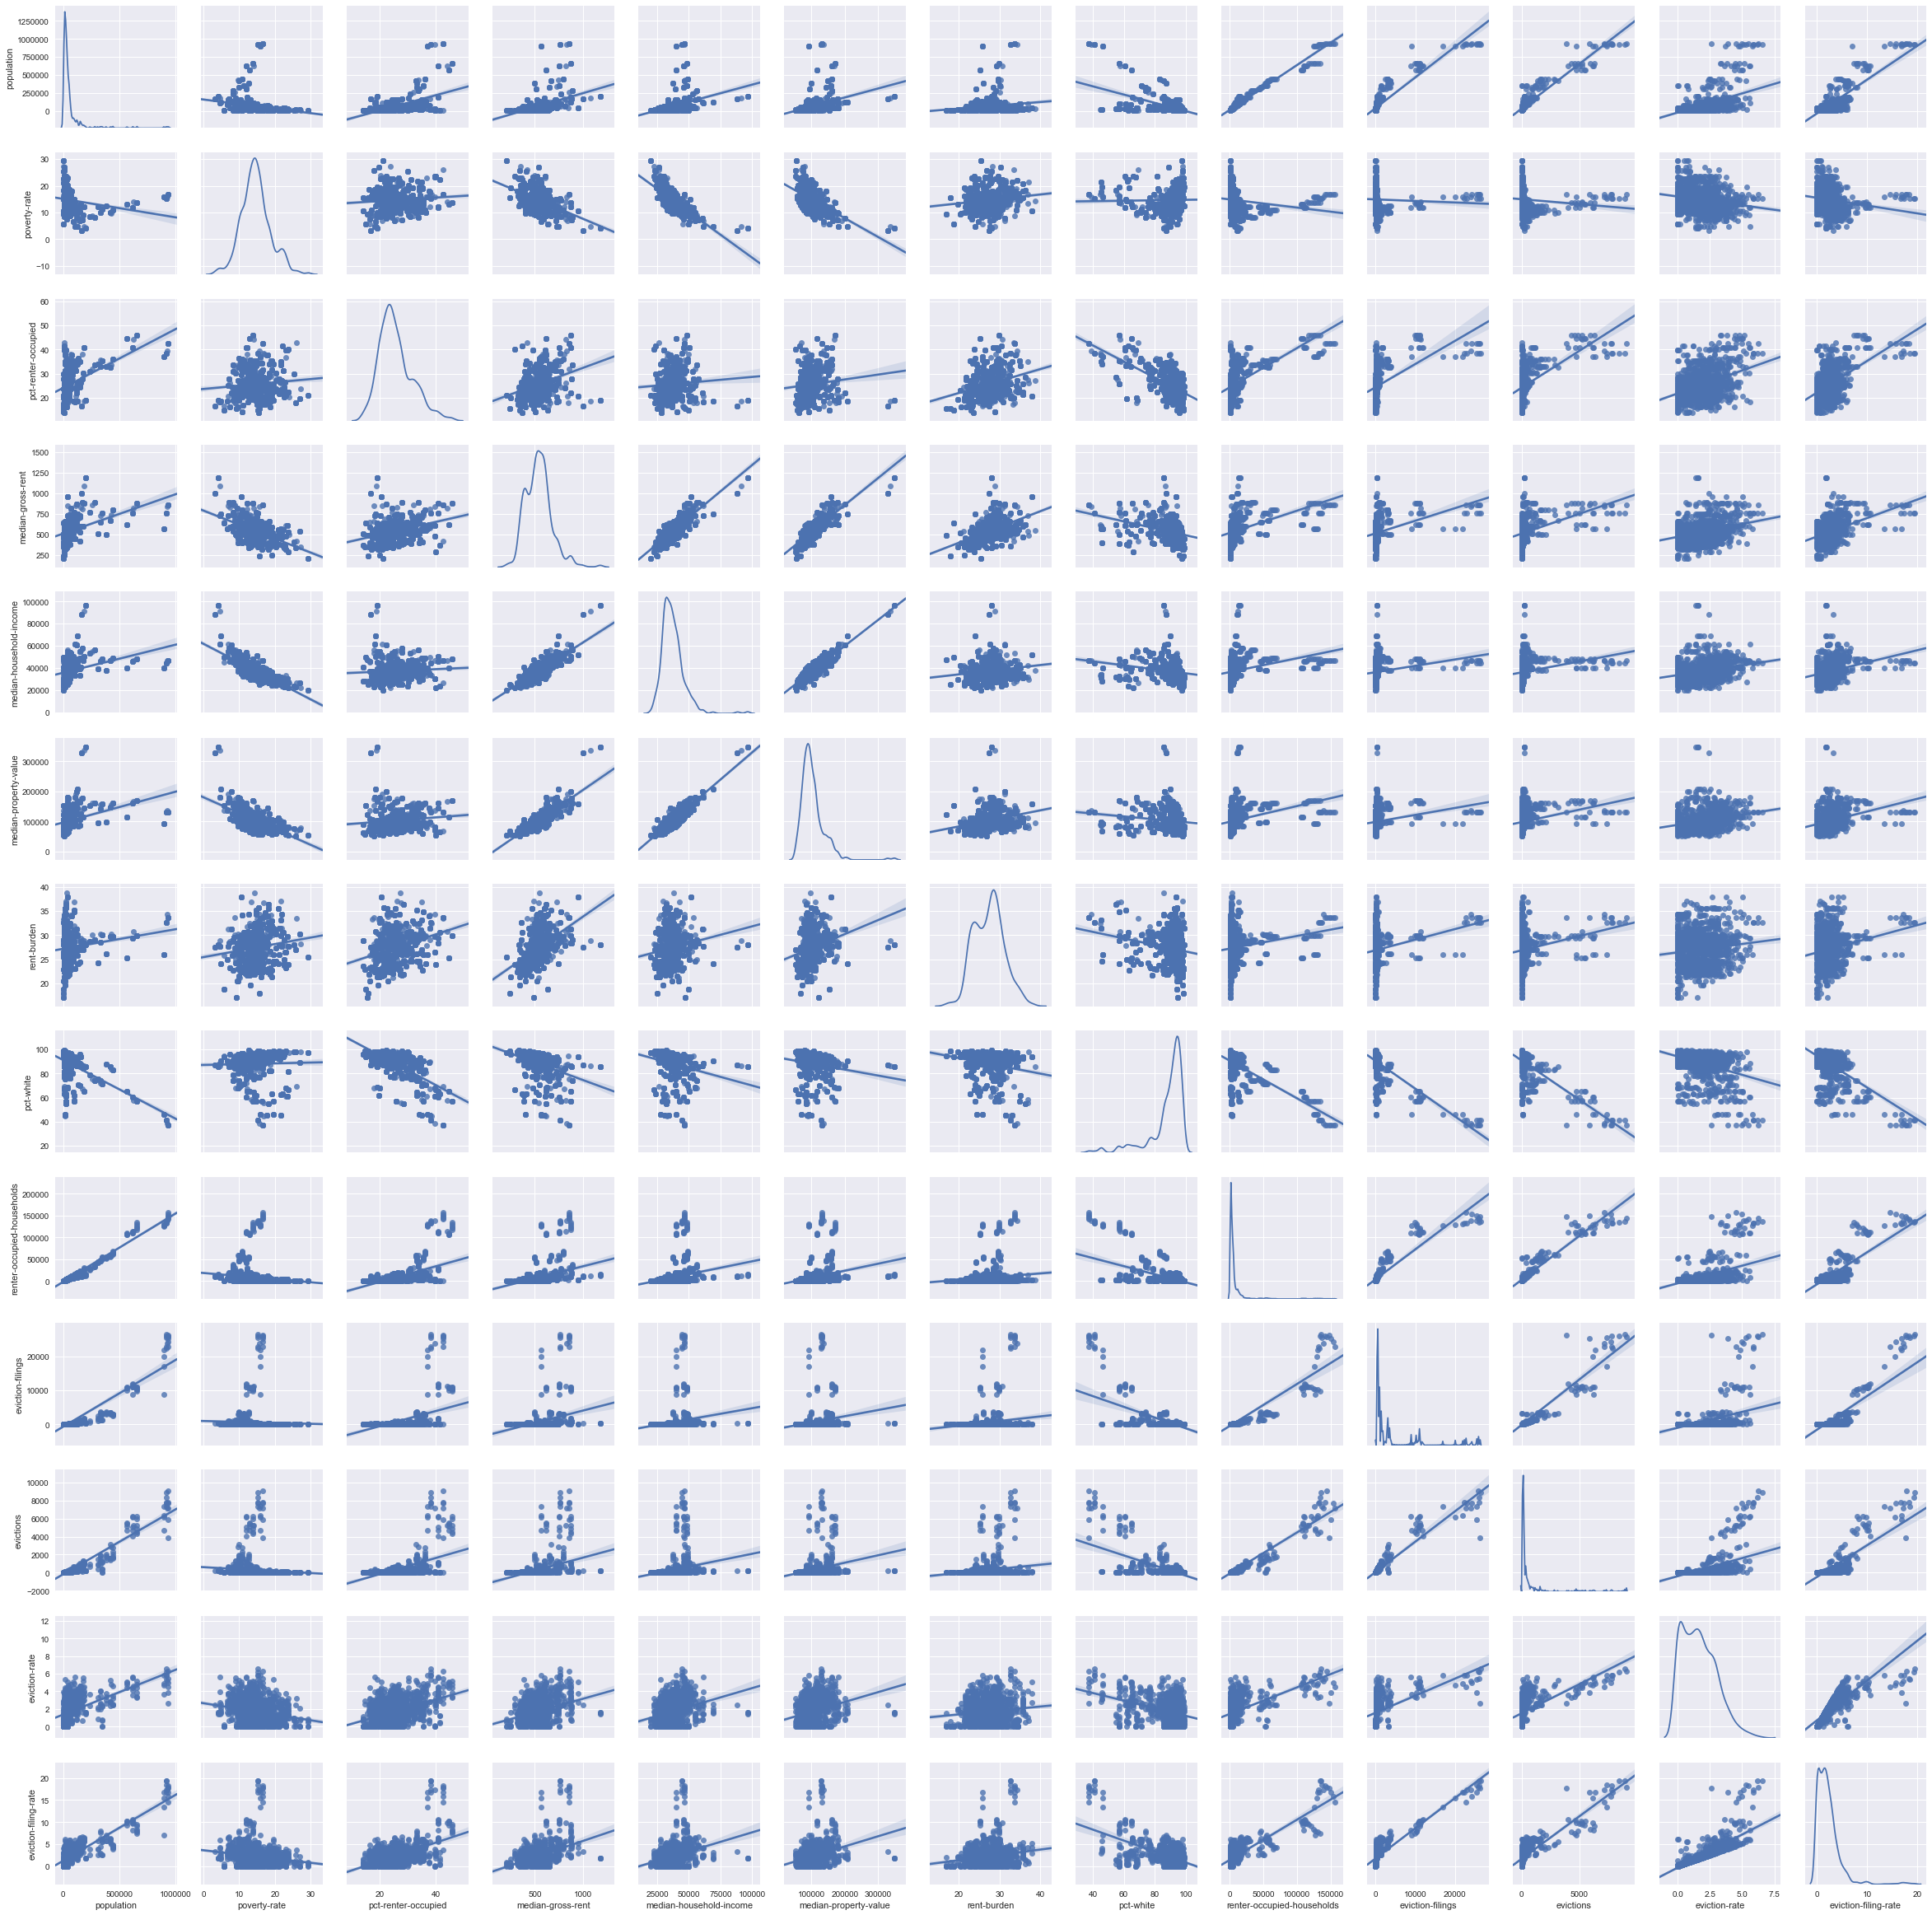

In [127]:
g = sns.pairplot(counties_evicts_df, kind = 'reg', diag_kind = 'kde', vars= consolidated_cols)

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


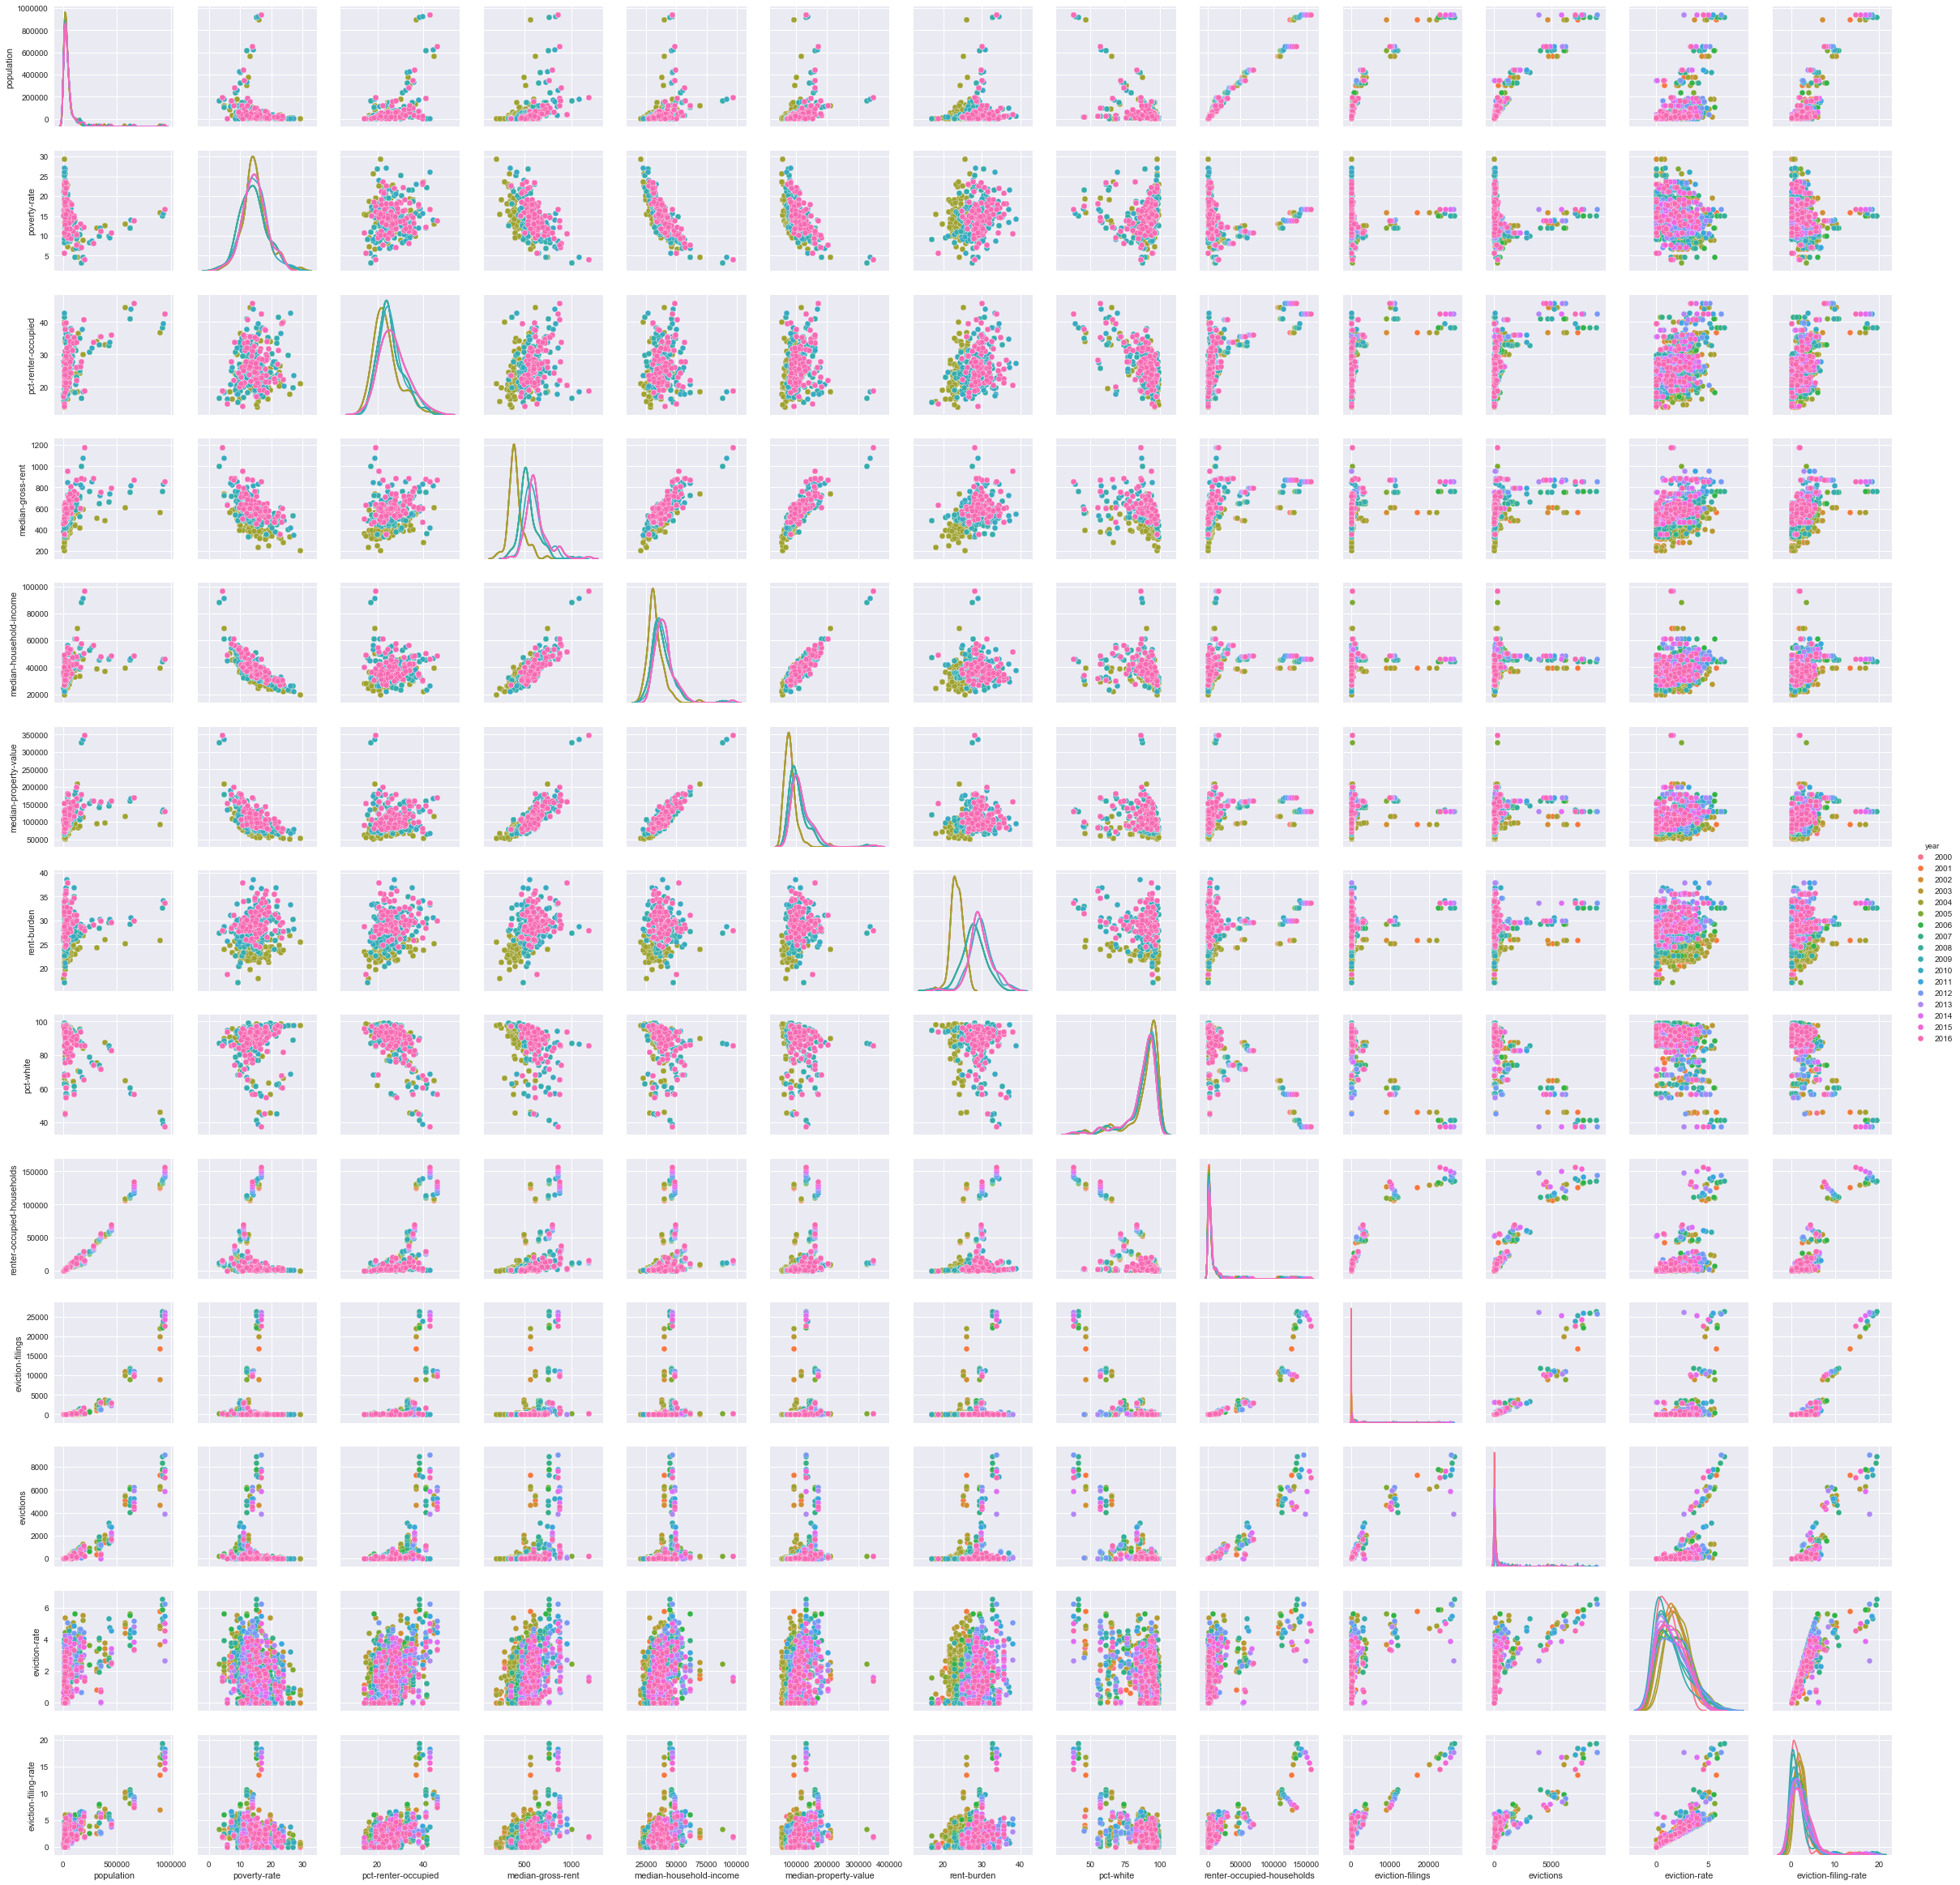

In [130]:
g = sns.pairplot(counties_evicts_df,
                 diag_kind = 'kde', hue = 'year', vars= consolidated_cols)

There is an error when using histograms instead of kernel density estimates. The error is caused by counties with 0 reported evictions... How should I handle these?

### Initial Observations
1. There is an interesting relationship between eviction and poverty
    - requires looking into time series data
2. **For now we can see that pct-white is significantly negatively correlated to:** (I should do some bootstrap validation on these correlation strenghts. Should also explore better polynomial regression fitting.) 
    - population
    - pct-renter occupied
    - median-groos-rent
    - eviction-filings
    - evictions
    - eviction-rate
    - eviction filing rate
    - **But not significantly correlated to poverty**
        - Does this suggest that, at the county level, being whiter won't determine whether you are in poverty. But it will make it much less likely that you will have eviction proceedins initiated on you or actually be evicted?
        - requires further investigation and contextualization
            - specifically: how does pct-white relate to pct-renter occupied. Or are there other variables that also display this differentiation?

**Note** the relationship between poverty-rate and renter occupied households, eviction filings, and evictions.
- there seems to be a strong positive correlation between these which sharply "drops off" or disappears as soon as we cross a poverty rate threshold of about 18%.
- **Does this mean that counties with over 18% poverty rates do not collect or do not report these metrics? What makes them and their poverty rate so radically insensitive to evictions and renter occupied houses?**

# Let's look at each county's time series 
And compare it to some macro rates like, National, Regional, Democrat controlled vs Republican controlled, State, State CORE region, etc...

In [133]:
# State Eviction Time-Series
main_df[main_df.name == "Tennessee"]

,GEOID,year,name,parent-location,population,poverty-rate,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,...,pct-multiple,pct-other,renter-occupied-households,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,47,2000,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,216654.0,4327.0,4012.0,1.85,2.00,1,0,0
1,47,2001,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,644469.0,40308.0,21137.0,3.28,6.25,1,0,0
2,47,2002,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,670555.0,34087.0,19987.0,2.98,5.08,1,0,0
3,47,2003,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,697749.0,48211.0,24730.0,3.54,6.91,1,0,0
4,47,2004,Tennessee,USA,5689283.0,13.48,30.07,505.0,36360.0,93000.0,...,0.96,0.08,701332.0,49125.0,25011.0,3.57,7.00,1,0,0
5,47,2005,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,645711.0,46366.0,24563.0,3.80,7.18,1,0,0
6,47,2006,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,645932.0,48361.0,24421.0,3.78,7.49,1,0,0
7,47,2007,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,634528.0,51538.0,21583.0,3.40,8.12,1,0,0
8,47,2008,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,611475.0,50382.0,22360.0,3.66,8.24,1,0,0
9,47,2009,Tennessee,USA,6158953.0,12.25,30.28,658.0,42943.0,128500.0,...,1.21,0.10,557880.0,46299.0,20461.0,3.67,8.30,1,0,0


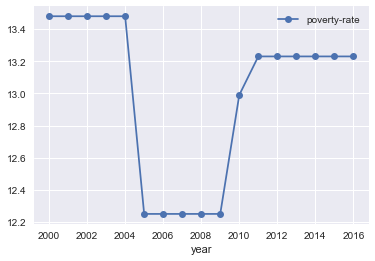

In [138]:
main_df[main_df.name == 'Tennessee'].plot(x = 'year', y = 'poverty-rate', marker = 'o')
plt.show()